In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
#import libraries
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, when, sum, avg, row_number
from pyspark.sql.window import Window
from pyspark.sql.functions import year, month, dayofmonth, when
from pyspark.sql.functions import lower, regexp_replace
from pyspark.sql.functions import current_date, expr

In [0]:
#create spark session
from pyspark.sql import SparkSession

#create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
#Define schema structure
ball_by_ball_df = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
#Read in dataset for ball by ball csv
ball_by_ball_df = spark.read.schema(ball_by_ball_df).format("csv").option("header","true").load("s3://rhea-github/Ball_By_Ball.csv")

In [0]:
#show first 5 rows
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
#Define structure schema for match csv
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
#Read in match dataset
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://rhea-github/Match.csv")

In [0]:
#Define player_match csv structure schema
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
#read in player_match data
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://rhea-github/Player_match.csv")

In [0]:
#Define player structure schema
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
#Read in player csv
player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://rhea-github/Player.csv")


In [0]:
#Define team structure schema 
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

#Read in team csv
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://rhea-github/Team.csv")

In [0]:
#Filer to include only valud deliveries (excluding wides and no balls)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))

#Calculate the total and avergae runs in each match and inning
total_and_average_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"), 
    avg("runs_scored").alias("average_runs")
)

In [0]:
#Calculate running total of runs in each match for each over window 
windowSpec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#Create a conditional colum to flag for high impact balls (when it is either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6)| (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
#tranform
#Extract year month and date from match_date column
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

#Create margins for winning into High , Medium, and Low
match_df = match_df.withColumn(
    "win_margin_category", 
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") <100), "Medium")
    .otherwise("Low")
)

#Create toss match winner (Yes if they won it or No if they did not)
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

#Show match_df
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
#

In [0]:

#Show dataframe
player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|            

In [0]:
#Add vertern status based on age 
player_match_df = player_match_df.withColumn(
    "veteran_status", 
    when(col("age_as_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)


#Calculate years player has been active
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)



player_match_df.show()

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------

In [0]:
#Change to sql table for analysis

ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
#Find top players in each season
top_scoring_batsmen_per_season = spark.sql("""
SELECT
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p On p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
 """)

In [0]:
#Show top 5 players
top_scoring_batsmen_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       SE Marsh|       2008|       614|
|      G Gambhir|       2008|       532|
|  ST Jayasuriya|       2008|       508|
|      SR Watson|       2008|       463|
|       GC Smith|       2008|       437|
|   AC Gilchrist|       2008|       431|
|      YK Pathan|       2008|       430|
|       SK Raina|       2008|       420|
|       MS Dhoni|       2008|       414|
|       V Sehwag|       2008|       399|
|      RG Sharma|       2008|       399|
|       R Dravid|       2008|       370|
|     SC Ganguly|       2008|       349|
|       S Dhawan|       2008|       340|
|  KC Sangakkara|       2008|       319|
|      DJ Hussey|       2008|       318|
|     RV Uthappa|       2008|       316|
|    SA Asnodkar|       2008|       311|
|   Yuvraj Singh|       2008|       299|
|       PA Patel|       2008|       297|
|Y Venugopal Rao|       2008|       283|
|      JA Morkel

In [0]:
#Display which bowler is more economical
economical_bowlers_powerplay = spark.sql("""
SELECT
p.player_name,
AVG(b.runs_scored) AS avg_runs_per_ball, COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <=6
GROUP BY p.player_name
HAVING COUNT(*) > 120
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show(5)

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|SMSM Senanayake|0.8492063492063492|            0|
|      SP Narine| 0.929718875502008|            0|
|     GD McGrath|0.9324324324324325|            0|
|     SL Malinga|0.9407630522088354|            0|
|  Sohail Tanvir| 0.946969696969697|            0|
+---------------+------------------+-------------+
only showing top 5 rows



In [0]:
#Determine win or loss of coin toss per player
individual_toss_match = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner, 
    CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
individual_toss_match.show(5)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



In [0]:
average_runs_in_winners = spark.sql("""
SELECT  p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")
average_runs_in_winners.show(5)

+-------------+------------------+--------------+
|  player_name|  avg_runs_in_wins|innings_played|
+-------------+------------------+--------------+
|  Rashid Khan|               6.0|             1|
|Shahid Afridi|3.3333333333333335|             6|
|     AN Ahmed|               3.0|             3|
|     BA Bhatt|               3.0|             2|
|      SN Khan|2.5789473684210527|            19|
+-------------+------------------+--------------+
only showing top 5 rows



In [0]:
import matplotlib.pyplot as plt

Visualizations

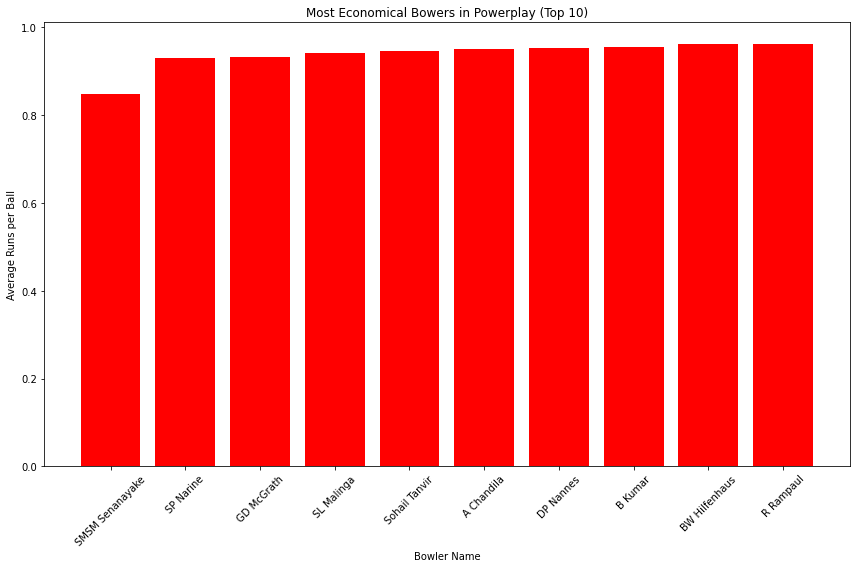

In [0]:
#Convert economical bowlers power play to pandas df
economical_bowlers = economical_bowlers_powerplay.toPandas()

#Visualize top econimic players
plt.figure(figsize=(12,8))
# Limit to look at top 10 players in plot
top_economical_bowlers = economical_bowlers.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color = 'red')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowers in Powerplay (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

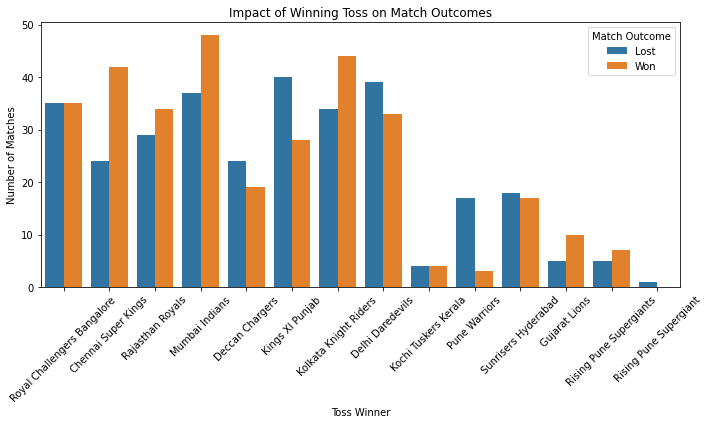

In [0]:
import seaborn as sns
#Create visualization on win/loss based on winning toss
toss_impact = individual_toss_match.toPandas()

#Create a count plot to show win/loss after win toss
plt.figure(figsize=(10,6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

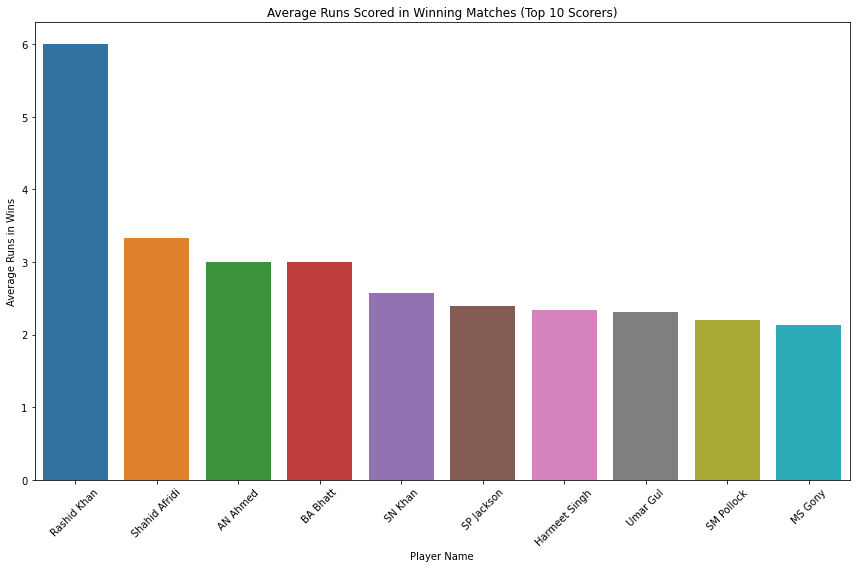

In [0]:
#Create average runs in winning matches 
average_runs = average_runs_in_winners.toPandas()

#Using Seaborn plot average runs in winning matches 
plt.figure(figsize=(12,8))
top_scorers = average_runs.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y ='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
#Execute SQL Query to analyze scores by venue
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM( 
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

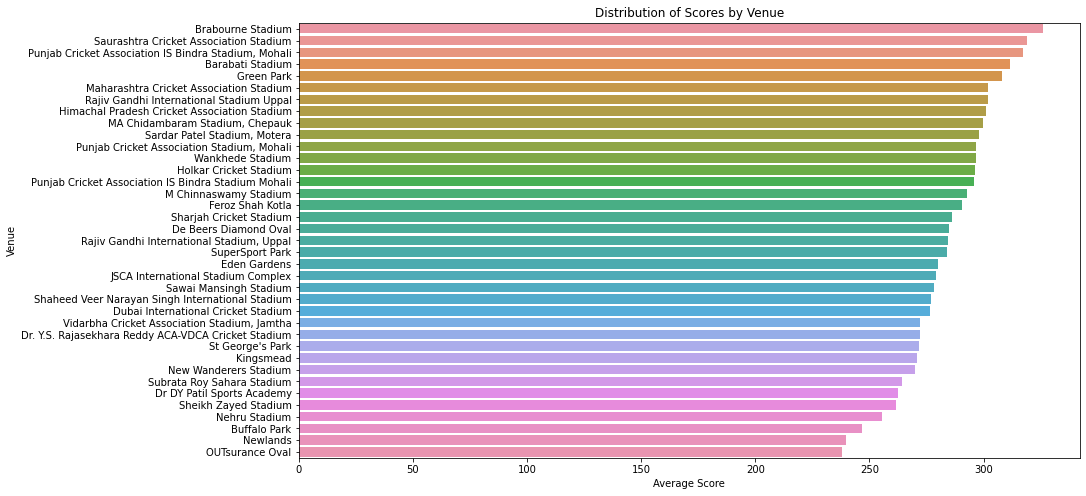

In [0]:
#Create scores by venue 
scors_by_venue_pd = scores_by_venue.toPandas()

#Using Seaborn plot scores by venues 
plt.figure(figsize=(14,8))
sns.barplot(x='average_score', y ='venue_name', data=scors_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
#Excute SQL Query for team performance 
team_toss_win_performance = spark.sql("""
SELECT team1, count(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

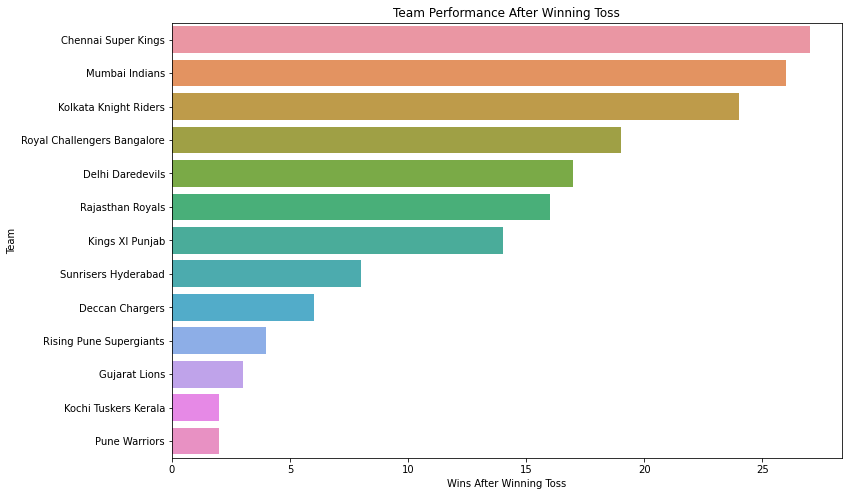

In [0]:
#Create ateam performance plot
team_toss_win_performance_pd = team_toss_win_performance.toPandas()

#Using Seaborn plot team performance
plt.figure(figsize=(12,8))
sns.barplot(x='wins_after_toss', y ='team1', data=team_toss_win_performance_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()